# **1.Treinamento**

In [ ]:
#Primeiro passo -> normalizar
#Segundo passo -> calibrar o número de grupos do cluster (Otimização)
#Terceiro passo -> treinar e salvar o modelo de cluster
#Quarto passo -> descrever os grupos do modelo (Centróides)
#Quinto passo => definir a qual grupo uma nova instância pertence

In [1]:
!pip install pandas==1.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 1. Lendo os dados do csv

import pandas as pd
dados = pd.read_csv('/content/drive/MyDrive/Sistemas Inteligentes Avancados/codon_usage.csv', sep = ',')
dados = dados.drop(columns = ['SpeciesName'])

dados

<ipython-input-3-91ff730499e0>:4: DtypeWarning: Columns (13,14,16,21,23,30,45,49,55,63,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv('/content/drive/MyDrive/Sistemas Inteligentes Avancados/codon_usage.csv', sep = ',')


,Kingdom,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,1.654,1.203,"5,00E-04",351,1.203,3.208,...,451,1.303,3.559,1.003,4.612,1.203,4.361,251,"5,00E-04",0
1,vrl,0,100220,1474,2.714,1.357,68,678,407,2.849,...,136,1.696,3.596,1.221,4.545,156,441.0,271,68,0
2,vrl,0,100755,4862,1.974,218.000,1.357,1.543,782,1.111,...,596,1.974,2.489,3.126,2.036,2.242,2.468,391,0,144
3,vrl,0,100880,1915,1.775,2.245,1.619,992,1.567,1.358,...,366,141,1.671,376,1.932,3.029,3.446,261,157,0
4,vrl,0,100887,22831,2.816,1.371,767,3.679,138,548,...,604,1.494,1.734,4.148,2.483,3.359,3.679,0,44,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,pri,0,9601,1097,2.552,3.555,547,1.367,1.276,2.097,...,82,1.367,1.094,1.367,2.279,2.005,4.102,91,91,638
13022,pri,1,9601,2067,1.258,3.193,1.984,629,1.451,5.322,...,145,0,48,194,1.306,1.838,677,242,97,1.887
13023,pri,1,9602,1686,1.423,3.321,1.661,356,1.127,5.042,...,0,0,0,178,1.661,2.788,297,356,119,2.017
13024,pri,0,9606,40662582,1.757,2.028,767,1.293,1.319,1.959,...,1.142,1.217,1.196,2.178,251,2.896,3.959,99,79,156


In [4]:
from sklearn import preprocessing 
normalizador = preprocessing.MinMaxScaler()

dados_num = dados.drop(columns = ['Kingdom', 'DNAtype', 'SpeciesID'])
dados_num

,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,1995,1.654,1.203,"5,00E-04",351,1.203,3.208,1,401,551,...,451,1.303,3.559,1.003,4.612,1.203,4.361,251,"5,00E-04",0
1,1474,2.714,1.357,68,678,407,2.849,204,441,1.153,...,136,1.696,3.596,1.221,4.545,156,441.0,271,68,0
2,4862,1.974,218.000,1.357,1.543,782,1.111,1.028,1.193,2.283,...,596,1.974,2.489,3.126,2.036,2.242,2.468,391,0,144
3,1915,1.775,2.245,1.619,992,1.567,1.358,94,1.723,2.402,...,366,141,1.671,376,1.932,3.029,3.446,261,157,0
4,22831,2.816,1.371,767,3.679,138,548,473,2.076,2.716,...,604,1.494,1.734,4.148,2.483,3.359,3.679,0,44,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,1097,2.552,3.555,547,1.367,1.276,2.097,82,3.555,1.459,...,82,1.367,1.094,1.367,2.279,2.005,4.102,91,91,638
13022,2067,1.258,3.193,1.984,629,1.451,5.322,7.644,1.258,3.096,...,145,0,48,194,1.306,1.838,677,242,97,1.887
13023,1686,1.423,3.321,1.661,356,1.127,5.042,9.609,1.068,2.728,...,0,0,0,178,1.661,2.788,297,356,119,2.017
13024,40662582,1.757,2.028,767,1.293,1.319,1.959,715,3.964,16.0,...,1.142,1.217,1.196,2.178,251,2.896,3.959,99,79,156


In [5]:
def process_value(value):
    if type(value) == str:
      return value.replace(',', '.')
    else:
      return value

for column in dados_num.columns:
  dados_num[column] = dados_num[column].apply(process_value)

dados_num = dados_num.applymap(lambda x: float(x) if isinstance(x, str) else x)
dados_num

,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,1995,1.654,1.203,0.0005,351.000,1.203,3.208,1.000,401.000,551.000,...,451.000,1.303,3.559,1.003,4.612,1.203,4.361,251.0,0.0005,0.000
1,1474,2.714,1.357,68.0000,678.000,407.000,2.849,204.000,441.000,1.153,...,136.000,1.696,3.596,1.221,4.545,156.000,441.000,271.0,68.0000,0.000
2,4862,1.974,218.000,1.3570,1.543,782.000,1.111,1.028,1.193,2.283,...,596.000,1.974,2.489,3.126,2.036,2.242,2.468,391.0,0.0000,144.000
3,1915,1.775,2.245,1.6190,992.000,1.567,1.358,94.000,1.723,2.402,...,366.000,141.000,1.671,376.000,1.932,3.029,3.446,261.0,157.0000,0.000
4,22831,2.816,1.371,767.0000,3.679,138.000,548.000,473.000,2.076,2.716,...,604.000,1.494,1.734,4.148,2.483,3.359,3.679,0.0,44.0000,131.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,1097,2.552,3.555,547.0000,1.367,1.276,2.097,82.000,3.555,1.459,...,82.000,1.367,1.094,1.367,2.279,2.005,4.102,91.0,91.0000,638.000
13022,2067,1.258,3.193,1.9840,629.000,1.451,5.322,7.644,1.258,3.096,...,145.000,0.000,48.000,194.000,1.306,1.838,677.000,242.0,97.0000,1.887
13023,1686,1.423,3.321,1.6610,356.000,1.127,5.042,9.609,1.068,2.728,...,0.000,0.000,0.000,178.000,1.661,2.788,297.000,356.0,119.0000,2.017
13024,40662582,1.757,2.028,767.0000,1.293,1.319,1.959,715.000,3.964,16.000,...,1.142,1.217,1.196,2.178,251.000,2.896,3.959,99.0,79.0000,156.000


In [6]:
modelo_normalizador = normalizador.fit(dados_num) 
dados_num_normalizado = normalizador.fit_transform(dados_num)

dados_num_normalizado

array([[2.44702727e-05, 1.65565566e-03, 1.20420420e-03, ...,
        2.52515091e-01, 5.05561173e-07, 0.00000000e+00],
       [1.16571952e-05, 2.71671672e-03, 1.35835836e-03, ...,
        2.72635815e-01, 6.87563195e-02, 0.00000000e+00],
       [9.49790886e-05, 1.97597598e-03, 2.18218218e-01, ...,
        3.93360161e-01, 0.00000000e+00, 1.44869215e-01],
       ...,
       [1.68709619e-05, 1.42442442e-03, 3.32432432e-03, ...,
        3.58148893e-01, 1.20323559e-01, 2.02917505e-03],
       [1.00000000e+00, 1.75875876e-03, 2.03003003e-03, ...,
        9.95975855e-02, 7.98786653e-02, 1.56941650e-01],
       [2.21289914e-01, 1.77977978e-03, 3.72772773e-03, ...,
        1.56941650e-01, 1.15267947e-01, 2.17404427e-03]])

In [7]:
from pickle import dump, load #compactador
dump(modelo_normalizador, open('/content/drive/MyDrive/Sistemas Inteligentes Avancados/normalizador_dna.model', 'wb'))

In [8]:
numeric_cols = list(dados_num.columns) 
numeric_cols

dados_cat = dados.drop(columns=numeric_cols)
dados_cat

,Kingdom,DNAtype,SpeciesID
0,vrl,0,100217
1,vrl,0,100220
2,vrl,0,100755
3,vrl,0,100880
4,vrl,0,100887
...,...,...,...
13021,pri,0,9601
13022,pri,1,9601
13023,pri,1,9602
13024,pri,0,9606


In [9]:
dummy_separator = '&'

dados_cat_normalizado = pd.get_dummies(dados_cat,prefix_sep=dummy_separator)
dados_cat_normalizado

,DNAtype,SpeciesID,Kingdom&arc,Kingdom&bct,Kingdom&inv,Kingdom&mam,Kingdom&phg,Kingdom&plm,Kingdom&pln,Kingdom&pri,Kingdom&rod,Kingdom&vrl,Kingdom&vrt
0,0,100217,0,0,0,0,0,0,0,0,0,1,0
1,0,100220,0,0,0,0,0,0,0,0,0,1,0
2,0,100755,0,0,0,0,0,0,0,0,0,1,0
3,0,100880,0,0,0,0,0,0,0,0,0,1,0
4,0,100887,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,0,9601,0,0,0,0,0,0,0,1,0,0,0
13022,1,9601,0,0,0,0,0,0,0,1,0,0,0
13023,1,9602,0,0,0,0,0,0,0,1,0,0,0
13024,0,9606,0,0,0,0,0,0,0,1,0,0,0


In [10]:
dados_num = pd.DataFrame(dados_num_normalizado, columns = dados_num.columns)
dados = dados_num.join(dados_cat_normalizado, how = 'left')
dados

,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,Kingdom&bct,Kingdom&inv,Kingdom&mam,Kingdom&phg,Kingdom&plm,Kingdom&pln,Kingdom&pri,Kingdom&rod,Kingdom&vrl,Kingdom&vrt
0,0.000024,0.001656,0.001204,5.005005e-07,0.351351,0.001204,0.003211,0.001001,0.401401,0.551552,...,0,0,0,0,0,0,0,0,1,0
1,0.000012,0.002717,0.001358,6.806807e-02,0.678679,0.407407,0.002852,0.204204,0.441441,0.001154,...,0,0,0,0,0,0,0,0,1,0
2,0.000095,0.001976,0.218218,1.358358e-03,0.001545,0.782783,0.001112,0.001029,0.001194,0.002285,...,0,0,0,0,0,0,0,0,1,0
3,0.000023,0.001777,0.002247,1.620621e-03,0.992993,0.001569,0.001359,0.094094,0.001725,0.002404,...,0,0,0,0,0,0,0,0,1,0
4,0.000537,0.002819,0.001372,7.677678e-01,0.003683,0.138138,0.548549,0.473473,0.002078,0.002719,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,0.000002,0.002555,0.003559,5.475475e-01,0.001368,0.001277,0.002099,0.082082,0.003559,0.001460,...,0,0,0,0,0,0,1,0,0,0
13022,0.000026,0.001259,0.003196,1.985986e-03,0.629630,0.001452,0.005327,0.007652,0.001259,0.003099,...,0,0,0,0,0,0,1,0,0,0
13023,0.000017,0.001424,0.003324,1.662663e-03,0.356356,0.001128,0.005047,0.009619,0.001069,0.002731,...,0,0,0,0,0,0,1,0,0,0
13024,1.000000,0.001759,0.002030,7.677678e-01,0.001294,0.001320,0.001961,0.715716,0.003968,0.016016,...,0,0,0,0,0,0,1,0,0,0


In [11]:
##2.Calibração de cluster (achar a melhor arquitetura para ser utilizada)
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np


distorcoes = []
K = range(1, 101) #intervalo fechado à esquerda e aberto à direita
for k in K:
  #treinamento
  modelo = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(dados) #fit é o método que gera o modelo
  #print(modelo.cluster_centers_)
  #Kmeans é o metaestimador, o resultado é o estimador
  #Qual o conjunto ótimo de hiperparâmetros para obter o melhor modelo possível?
  distorcoes.append(
      sum(np.min(
          #Avalia as distâncias dos centroides, pega a mínima e guarda, depois tira a média e joga na matriz
          cdist(dados, modelo.cluster_centers_, 'euclidean'), axis=1))/dados.shape[0] #o shape trás o número de linhas 
  )


#Média da soma das menores distâncias de cada treinamento -> distorções


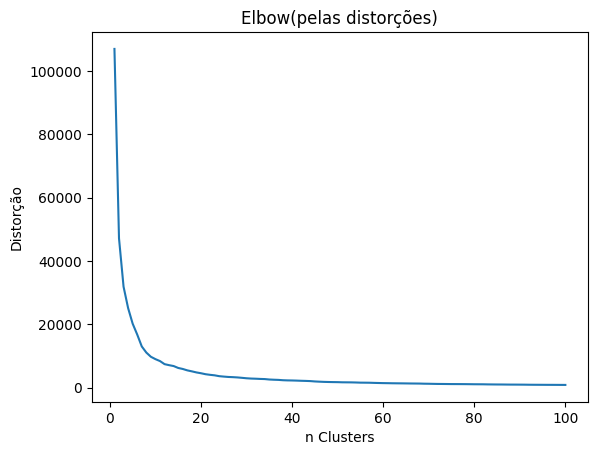

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(K, distorcoes)
ax.set(xlabel='n Clusters', ylabel='Distorção', title='Elbow(pelas distorções)')
fig.savefig('dados_distorcao_.png')
plt.show()

In [68]:
#Calcular número ideal de clusters
import math
x0 = K[0]
y0 = distorcoes[0]

x1 = K[len(K)-1]
y1 = distorcoes[len(distorcoes)-1]

distancias = []
for i in range(len(distorcoes)):
  x = K[i]
  y = distorcoes[i]
  numerador = abs((y1-y0)*x - (x1-x0)*y + x1*y0 - y1*x0)
  denominador = math.sqrt((y1-y0)**2 + (x1-x0)**2)
  distancias.append(numerador/denominador)

#maior distância
n_clusters_otimo = K[distancias.index(np.max(distancias))]
print('Número ideal de clusters : ', K[distancias.index(np.max(distancias))])

Número ideal de clusters :  9


In [70]:
#Treinar o modelo definitivo usando a melhor arquitetura encontrada no passo anterior
#Salvar em memória o modelo
from pickle import dump

modelo = KMeans(n_clusters=n_clusters_otimo, random_state=42, n_init='auto').fit(dados)

dump(modelo, open('/content/drive/MyDrive/Sistemas Inteligentes Avancados/cluster_dna.model', 'wb'))

 

In [71]:
dados

,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,Kingdom&bct,Kingdom&inv,Kingdom&mam,Kingdom&phg,Kingdom&plm,Kingdom&pln,Kingdom&pri,Kingdom&rod,Kingdom&vrl,Kingdom&vrt
0,0.000024,0.001656,0.001204,5.005005e-07,0.351351,0.001204,0.003211,0.001001,0.401401,0.551552,...,0,0,0,0,0,0,0,0,1,0
1,0.000012,0.002717,0.001358,6.806807e-02,0.678679,0.407407,0.002852,0.204204,0.441441,0.001154,...,0,0,0,0,0,0,0,0,1,0
2,0.000095,0.001976,0.218218,1.358358e-03,0.001545,0.782783,0.001112,0.001029,0.001194,0.002285,...,0,0,0,0,0,0,0,0,1,0
3,0.000023,0.001777,0.002247,1.620621e-03,0.992993,0.001569,0.001359,0.094094,0.001725,0.002404,...,0,0,0,0,0,0,0,0,1,0
4,0.000537,0.002819,0.001372,7.677678e-01,0.003683,0.138138,0.548549,0.473473,0.002078,0.002719,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,0.000002,0.002555,0.003559,5.475475e-01,0.001368,0.001277,0.002099,0.082082,0.003559,0.001460,...,0,0,0,0,0,0,1,0,0,0
13022,0.000026,0.001259,0.003196,1.985986e-03,0.629630,0.001452,0.005327,0.007652,0.001259,0.003099,...,0,0,0,0,0,0,1,0,0,0
13023,0.000017,0.001424,0.003324,1.662663e-03,0.356356,0.001128,0.005047,0.009619,0.001069,0.002731,...,0,0,0,0,0,0,1,0,0,0
13024,1.000000,0.001759,0.002030,7.677678e-01,0.001294,0.001320,0.001961,0.715716,0.003968,0.016016,...,0,0,0,0,0,0,1,0,0,0


In [72]:
#Desnormalizar dados categóricos

# 1. Criar um DataFrame que contém os centroides do cluster como linhas e as os dados como colunas (12 x 4)
cluster = pd.DataFrame(modelo.cluster_centers_, columns=dados.columns)
cluster

,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,Kingdom&bct,Kingdom&inv,Kingdom&mam,Kingdom&phg,Kingdom&plm,Kingdom&pln,Kingdom&pri,Kingdom&rod,Kingdom&vrl,Kingdom&vrt
0,0.002430,0.096357,0.077510,0.173209,0.165355,0.150099,0.163386,0.302918,0.188674,0.088543,...,0.203517,0.162162,0.058613,0.015630,1.628134e-03,0.267340,0.022468,0.019538,0.133507,0.107782
1,0.004689,0.094327,0.097220,0.118952,0.179578,0.150971,0.209005,0.229194,0.196911,0.081164,...,0.301523,0.035533,0.019289,0.061929,2.030457e-03,0.082234,0.006091,0.008122,0.290355,0.176650
2,0.001390,0.103318,0.073542,0.135764,0.192713,0.115005,0.193890,0.212260,0.240858,0.075652,...,0.204991,0.063280,0.042781,0.014260,2.673797e-03,0.147059,0.005348,0.008913,0.217469,0.283422
3,0.000590,0.114130,0.072182,0.149162,0.162955,0.129491,0.158278,0.241358,0.205338,0.084134,...,0.228407,0.103647,0.039028,0.008957,6.397953e-04,0.236724,0.014075,0.015995,0.160589,0.184901
4,0.002578,0.091035,0.072200,0.116870,0.199417,0.160067,0.176990,0.263908,0.254792,0.088808,...,0.270812,0.065196,0.032096,0.013039,-1.691355e-17,0.095286,0.005015,0.003009,0.328987,0.177533
5,0.003635,0.089560,0.077546,0.119164,0.171206,0.129396,0.192749,0.280001,0.252287,0.089383,...,0.245320,0.066995,0.032512,0.011823,-1.409463e-17,0.118227,0.001970,0.022660,0.342857,0.137931
6,0.003776,0.090080,0.096017,0.115949,0.175269,0.122207,0.209661,0.268303,0.245746,0.089423,...,0.322626,0.067039,0.032123,0.018156,5.586592e-03,0.082402,0.001397,0.005587,0.346369,0.099162
7,0.000426,0.095309,0.078953,0.155631,0.165605,0.143969,0.167827,0.266704,0.211154,0.086445,...,0.183806,0.119433,0.048178,0.006073,4.048583e-04,0.242105,0.019028,0.020243,0.213360,0.140891
8,0.000558,0.104884,0.086385,0.135346,0.167270,0.118426,0.173231,0.211515,0.215259,0.064478,...,0.189512,0.094756,0.052438,0.025759,1.839926e-03,0.196872,0.020239,0.029439,0.173873,0.210672


In [73]:
# 2. Criar um dataframe que contém os dados categóricos do cluster, e verifica se ele está presente ou não em cada centroide
cluster_cat_data = cluster[dados_cat_normalizado.columns].round(0).abs().astype(int)==1

cluster_cat_data

,DNAtype,SpeciesID,Kingdom&arc,Kingdom&bct,Kingdom&inv,Kingdom&mam,Kingdom&phg,Kingdom&plm,Kingdom&pln,Kingdom&pri,Kingdom&rod,Kingdom&vrl,Kingdom&vrt
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False


In [74]:
# Desnormalizar dados numéricos

# Só contem os dados numéricos, e retorna os dados a sua escala anterior
cluster_data_num = cluster.drop(columns=dados_cat_normalizado.columns)
dados_num_desnormalizado = normalizador.inverse_transform(cluster_data_num)

# Converte os dados desnormalizados para dataframe e usa o nomes originais das colunas
dados_num_desnormalizado = pd.DataFrame(dados_num_desnormalizado, columns=dados_num.columns)
print(dados_num_desnormalizado)


    Ncodons       UUU       UUC       UUA       UUG       CUU       CUC  \
0  0.002430  0.096357  0.077510  0.173209  0.165355  0.150099  0.163386   
1  0.004689  0.094327  0.097220  0.118952  0.179578  0.150971  0.209005   
2  0.001390  0.103318  0.073542  0.135764  0.192713  0.115005  0.193890   
3  0.000590  0.114130  0.072182  0.149162  0.162955  0.129491  0.158278   
4  0.002578  0.091035  0.072200  0.116870  0.199417  0.160067  0.176990   
5  0.003635  0.089560  0.077546  0.119164  0.171206  0.129396  0.192749   
6  0.003776  0.090080  0.096017  0.115949  0.175269  0.122207  0.209661   
7  0.000426  0.095309  0.078953  0.155631  0.165605  0.143969  0.167827   
8  0.000558  0.104884  0.086385  0.135346  0.167270  0.118426  0.173231   

        CUA       CUG       AUU  ...       CGG       AGA       AGG       GAU  \
0  0.302918  0.188674  0.088543  ...  0.287863  0.183042  0.257678  0.100083   
1  0.229194  0.196911  0.081164  ...  0.257406  0.162318  0.223973  0.114411   
2  0.2122

In [83]:
# Cria um df vazio que vai armazenar as descrições categóricas de cada nucleo
cluster_description = pd.DataFrame(columns = dados_cat.columns)



# Pega o nome original das colunas
num_columns = dados_num.columns

cluster_desc = {}

In [79]:
# intera em cada linha do cluster_cat_data
for i in range(0,len(cluster_cat_data)):
  # seleciona cada linha e cria um df que a contém
  cluster = cluster_cat_data.filter(items=[i], axis=0)
  # intera em cada coluna de dados categóricos
  for c in cluster.columns:
    if c.find('&')>=0:
      # se a linha atual df do cluster é True, ou seja, se esse valor está presente nesse cluster
      if (cluster[c].values):
        print("coluna " + c)
        c = (c.split('&'))
        print(c[1] + " " + str(i))
        cluster_desc[c[0]]=c[1]
    else:
      cluster_desc[c] = str(cluster_desc[c].values[0])
      print(cluster_desc[c])
  cluster_description=cluster_description.append(cluster_desc, ignore_index=True)



KeyError: ignored

In [ ]:
dados2 = dados_num_desnormalizado.join(cluster_description, how = 'left')
print(type(dados_num_desnormalizado))
dados2

<class 'pandas.core.frame.DataFrame'>


,idade,altura,Peso,sexo
0,73.722222,1.0,171.222222,F
1,76.533333,1.0,111.066667,M
2,26.230769,2.0,57.461538,F
3,70.000000,2.0,177.133333,M
4,46.000000,1.0,66.086957,F
5,33.157895,1.0,46.578947,M
6,20.625000,2.0,149.041667,M
7,88.933333,2.0,88.466667,F
8,37.375000,2.0,180.250000,F
9,20.538462,1.0,198.538462,M


In [ ]:
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- #

In [ ]:
import pickle 
modelo = pickle.load(open('/content/cluster1.model', 'rb'))
modelo

KMeans(n_clusters=12, n_init='auto', random_state=42)